In [44]:
##"I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work."

In [45]:
!pip install gym

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time

In [47]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 250
        self.reward= 0

    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        pos= self.agent_pos[0]*4+self.agent_pos[1]
        self.goal_pos = [3, 3]
        self.wall1 = [0,1]
        self.wall2 = [3,2]
        self.wall3 = [2,2]
        self.state = np.zeros([4,4])
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 3
        self.state[tuple(self.wall1)] = 5
        self.state[tuple(self.wall2)] = 5
        self.state[tuple(self.wall3)] = 5
        self.reward=1
        observation = self.state.flatten()
        return pos
    
    def step(self, action):
        if action == 0:
          self.agent_pos[0] += 1
          if self.agent_pos[0] == 4:
            self.agent_pos[0] -= 1
        if action == 1:
          self.agent_pos[0] -= 1
          if self.agent_pos[0] == -1:
            self.agent_pos[0] += 1
        if action == 2:
          self.agent_pos[1] += 1
          if self.agent_pos[1] == 4:
            self.agent_pos[1] -= 1
        if action == 3:
          self.agent_pos[1] -= 1
          if self.agent_pos[1] == -1:
            self.agent_pos[1] += 1
        s_table=np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])
        npos = s_table[tuple(self.agent_pos)]
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 3
        
        r_table= np.array([[-1,-50,-1,-1],[-1,-1,-1,-1],[-1,-1,-50,-1],[-1,-1,-50,100]])
        reward= r_table[tuple(self.agent_pos)]
        self.timestep += 1
        done = True if npos == 15 else False
        info = {}
        return npos, reward, done, info
        
    def render(self):
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 3
        self.state[tuple(self.wall1)] = 5
        self.state[tuple(self.wall2)] = 5
        self.state[tuple(self.wall3)] = 5
        plt.imshow(self.state)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

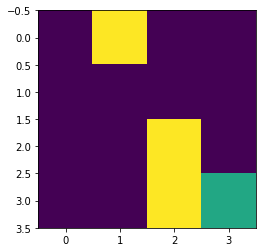

<IPython.core.display.Javascript object>

5
Model Ready! Training finished.

Total Episodes: 1000
Total Timesteps: 39651
Total Penalties: 37549
Average timesteps per episode: {total_epochs / episodes}
Average penalties per episode: {total_penalties / episodes}
SARSA Table:
 [[ 5.07418054e+00 -1.07770072e+00 -5.31655145e+01 -2.20711101e+00]
 [-9.94741370e+00 -6.14561202e+01 -1.13911203e+01 -7.88356971e-02]
 [-9.61432382e+00 -1.21017556e+01  6.57624451e+00 -5.98376758e+01]
 [ 2.76280543e+01 -2.12859528e+00 -2.38567738e+00 -6.53851654e+00]
 [-1.81834830e+00 -1.47365833e+00  1.00599432e+01  9.19334756e-01]
 [-3.31173387e+00 -5.38920054e+01  1.90045968e+01 -6.81193074e-01]
 [-2.78367281e+01 -4.17889754e+00  3.43992003e+01  1.09564674e+00]
 [ 5.89998958e+01  8.13790533e+00  2.10838096e+01 -5.12553857e-01]
 [-2.44375511e+00  1.90252113e+00 -5.21360350e+00 -2.77861503e+00]
 [-3.07403576e+00 -4.23260328e+00 -3.09352137e+01 -1.72645226e+00]
 [-1.59410144e+01 -6.19831204e+00  5.23901229e+01 -9.25522959e+00]
 [ 1.00000000e+02  1.97267969e

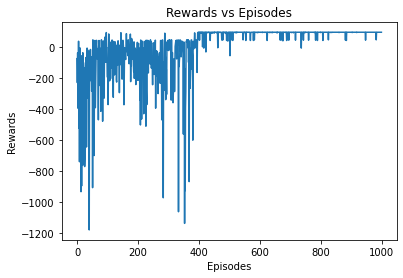

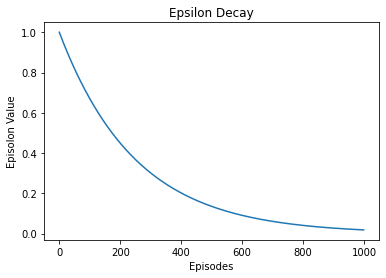

In [48]:
#SARSA Algorithm
from matplotlib import figure
env = GridEnvironment()
#Creating a Q_Table
q1_table = np.zeros([env.observation_space.n, env.action_space.n])
output_grid = widgets.Grid(1, 1)
alpha = 0.1
gamma = 0.6
epsilon = 0.9

# For plotting metrics
total_epochs=0
episodes=1000
t_e= []
t_r = []
t_a=[]
all_epochs = 0
total_penalties = 0
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(q1_table[state, :])
    return action

for i in range(episodes):
    state1 = env.reset()
    action1 = choose_action(state1)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done, info = env.step(action1)
        action2 = choose_action(state2)          
        #Learning the Q-value
        q1_table[state1, action1] = q1_table[state1, action1] + alpha * (reward + gamma * q1_table[state2, action2] - q1_table[state1, action1])  
        state1 = state2
        action1 = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):#Displays last iteration/Episode
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            env.render()
          time.sleep(1)        
    t_e.append(epochs) #Timesteps for each Episode
    t_r.append(r)#Rewards for each Episode    
    total_epochs += epochs
    total_penalties += penalties
    epsilon= np.exp(-4*i/episodes)
    t_a.append(epsilon)  
plt.plot(t_r)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(t_a)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')        
print(penalties)
print("Model Ready! Training finished.\n")
print("Total Episodes:",episodes)
print("Total Timesteps:",total_epochs)
print("Total Penalties:", total_penalties)
print("Average timesteps per episode: {total_epochs / episodes}")
print("Average penalties per episode: {total_penalties / episodes}")
print("SARSA Table:\n", q1_table)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

15
Episode: 9


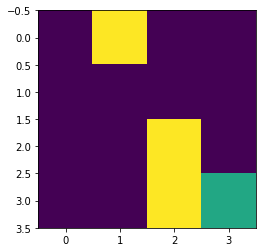

<IPython.core.display.Javascript object>

5
Testing Complete.

Total Episodes: 10
Total Timesteps: 60
Total Penalties: 50
Average timesteps per episode: 6.0
Average penalties per episode: 5.0


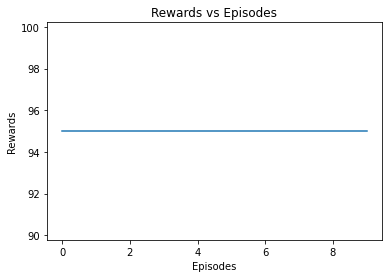

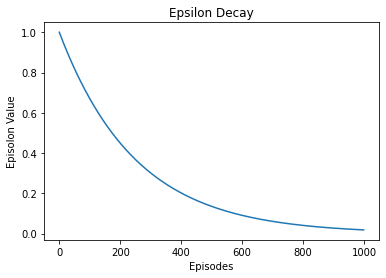

In [53]:
total_epochs, total_penalties = 0, 0
episodes = 10
t_r1=[]
t_e1=[]

for _ in range(episodes):
    r1=0
    state = env.reset()
    epochs, penalties1, reward = 0, 0, 0    
    done = False    
    while not done:
        action = np.argmax(q1_table[state])
        state, reward, done, info = env.step(action)
        if reward == -1:
            penalties1 += 1
        r1+=reward    
        epochs += 1
        if(_>8):#Displays last iteration/Episode
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            print(state)
            print(f"Episode:", _)
            env.render()  
          time.sleep(1)
    total_epochs += epochs
    total_penalties += penalties1
    t_e1.append(epochs) #Timesteps for each Episode
    t_r1.append(r1) #Rewards for each Episode    
plt.plot(t_r1) 
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(t_a)
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')         
print(penalties1)
print("Testing Complete.\n")
print("Total Episodes:",episodes)
print("Total Timesteps:",total_epochs)
print("Total Penalties:", total_penalties)
u=total_epochs/episodes
v=total_penalties/episodes
print("Average timesteps per episode:", u )
print("Average penalties per episode:", v)